## Conditional probability

In [2]:
def random_kid():
    return random.choice(["boy", "girl"])

In [7]:
import random

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

In [8]:
print("P(both | older):", both_girls/older_girl)

P(both | older): 0.5007089325501317


In [9]:
print("P(both | either):", both_girls/either_girl)

P(both | either): 0.3311897106109325


In [10]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

In [11]:
uniform_pdf(0.5)

1

In [12]:
def uniform_cdf(x):
    if x < 0: 
        return 0
    elif x < 1:
        return x
    else:
        return 1

In [13]:
uniform_cdf(0.5)

0.5

In [14]:
import math

def normal_pdf(x, mu=0, sigma = 1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return math.exp(-(x - mu) **2/2/sigma ** 2) / (sqrt_two_pi * sigma)

In [15]:
normal_pdf(0)

0.3989422804014327

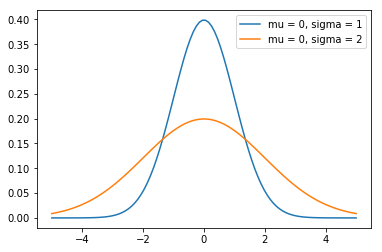

In [21]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(-5, 5, num = 100)
plt.plot(xs, [normal_pdf(x, sigma = 1) for x in xs], '-', label = 'mu = 0, sigma = 1')
plt.plot(xs, [normal_pdf(x, sigma = 2) for x in xs], '-', label = 'mu = 0, sigma = 2')
plt.legend()
plt.show()

In [24]:
import random

def bernoulli_trial(p):
    """Bernoulli distribution with probility of p"""
    return 1 if random.random() < p else 0

In [25]:
a = bernoulli_trial(0.8)

In [26]:
a

1

In [27]:
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [28]:
binomial(100, 0.8)

88

## Central limit theorem

In [37]:
from collections import Counter

def make_hist(n, p, num_points):
    """Using central limit theorem to estimate the mu and sigma"""
    data = [binomial(n, p) for _ in range(num_points)]
    
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x for x in histogram.keys()], 
           [v/num_points for v in histogram.values()],
           0.8,
           color = '0.75')
    mu = n * p
    sigma = math.sqrt(n * p * (1 - p))
    
    xs = range(min(data), max(data) + 1)
    ys = [normal_pdf(i, mu, sigma)
         for i in xs]
    plt.plot(xs, ys)
    plt.title("Central limit theorem")
    plt.show()

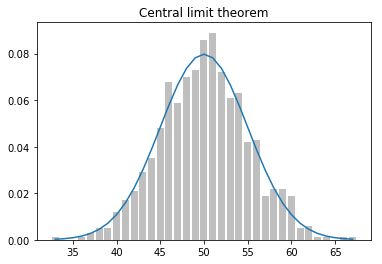

In [39]:
make_hist(100, 0.5, 1000)

## Central Tendencies

First, we will discuss the notion of mean.

In [6]:
def mean(x):
    return sum(x)/len(x)

In [2]:
mean([1, 2])

1.5

In [36]:
def median(v):
    """finds the median of the vector v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi])/2

In [35]:
import random

def in_random_order(data):
    """generate that returns the element of data in random order."""
    indexes = [i for i, _ in enumerate(data)]
    print(indexes)
    random.shuffle(indexes)
    print(indexes)
    for i in indexes:
        yield data[i]

# some questions about this algorithm

# The follwong is the new median function which is implemented with new algorithm

In [43]:
import random

def median1(v, position):
    n = len(v)
    if n == 1:
        return v[0]
    random.shuffle(v)
    temp = 1
    for i in range(1, n):
        if v[i] < v[0]:
            tt = v[temp] 
            v[temp] = v[i]
            v[i] = tt
            temp += 1
    if temp - 1 == position:
        return v[0]
    elif temp > position + 1:
        return median1(v[1:temp], position)
    else:
        return median1( v[temp:], position - temp)
        


        

In [50]:
def median_new(v):
    n = len(v)
    if n % 2 == 1:
        return median1(v, (n - 1)/2)
    else:
        return (median1(v, n/2 - 1) + median1(v, n/2))/2
    

In [82]:
start = time.time()
median_new([1, 3, 7, 4, 5, 10, 6, 11, 19, 8])
end = time.time()
print(end - start)

0.00015163421630859375


In [84]:
start = time.time()
median([1, 3, 7, 4, 5, 10, 6, 11, 19, 8])
end = time.time()
print(end - start)

6.389617919921875e-05


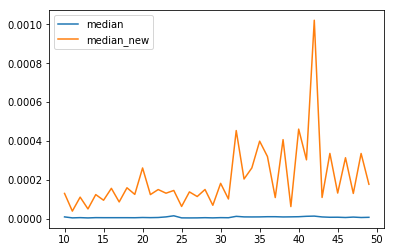

In [81]:
import time
import random
import matplotlib.pyplot as plt

elapse_1 = [] # time elapse for median function

elapse_2 = [] # time elapse for median_new function

for length in range(10, 50):
    lst = [random.randint(0, 200) for _ in range(length)]
    start_1 = time.time()
    result = median(lst)
    end_1 = time.time()
    elapse_1.append(end_1 - start_1)
    
    start_2 = time.time()
    result_new = median_new(lst)
    end_2 = time.time()
    elapse_2.append(end_2 - start_2)
    
    if result != result_new:
        print('error')
        break
        
plt.plot(range(10, 50), elapse_1, label = 'median')
plt.plot(range(10, 50), elapse_2, label = 'median_new')
plt.legend()
plt.show()



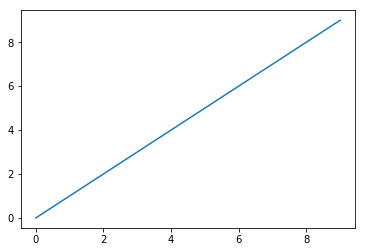

In [79]:
import matplotlib.pyplot as plt
from numpy import arange, sin, pi

t = list(range(10))

plt.plot(t, t)
plt.show()

In [80]:
s = range(10)
a = list(s)

In [67]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## Dispersion

In [13]:
import random

def data_range(x):
    return max(x) - min(x)

num_friends = [random.random() * 100 for _ in range(100)]  

In [65]:
data_range(num_friends)

98.90962432286695

In [4]:
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

In [5]:
def variance(x):
    """assumes that x has at least two elements"""
    n = len(x)
    if n <= 1:
        print('error')
        return
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

In [8]:
def sum_of_squares(x):
    """return the sum of the squares of the elements of x"""
    return sum([x_i ** 2 for x_i in x])

In [71]:
sum_of_squares([1, 2, 3])

14

In [72]:
variance(num_friends)

812.2760479852436

In [9]:
import math

def standard_deviation(x):
    return math.sqrt(variance(x))

In [10]:
standard_deviation([1, 2, 3])

1.0

In [14]:
standard_deviation(num_friends)

26.96750805853303

In [19]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

In [20]:
daily_minutes = [random.random() * 100 for _ in range(100)] 

In [21]:
covariance(num_friends, daily_minutes)

39.59695066790181

In [18]:
def dot(x, y):
    """return the dot production of x and y"""
    return sum([x_i * y_i for x_i, y_i in zip(x, y)])

In [22]:
def correlation(x, y):
    """return the correlation of x and y"""
    stdv_x = standard_deviation(x)
    stdv_y = standard_deviation(y)
    if stdv_x > 0 and stdv_y > 0:
        return covariance(x, y) / stdv_x / stdv_y
    else:
        return 0